In [1]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import json
from pathlib import Path
from utils import create_directory
from model import test
import plot as plot
import numpy as np
import matplotlib.pyplot as plt
from utils import optimize_channel

In [2]:
data_dir = create_directory(directory_name='finetune14')

0.0357746590066093


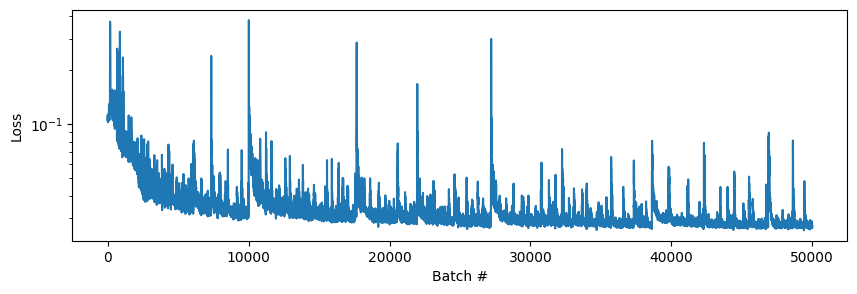

In [113]:
model_num = 44
model_name = "model{:02d}".format(model_num)

phase = 'growing_up'
log_file = list(Path(data_dir).glob(f'{model_name}_phase={phase}_*_log.json'))[0]
log = json.load(open(log_file,'r'))
fig,ax = plot.plot_training_log(log,'position',w=1)

In [115]:
loss_weight = np.array([[1, 1e-4, 1e-5, 5e-5, 5e-2, 5e1],
                    [1, 1e-4, 1e-5, 5e-5, 5e-2, 8e1],
                    [1, 1e-4, 1e-5, 5e-5, 5e-2, 1e2],
                    [1, 1e-4, 1e-5, 5e-5, 5e-2, 2e2],
                    [1, 1e-4, 1e-5, 5e-5, 5e-2, 5e2],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 1e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 2e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 3e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 4e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 5e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 8e1],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 1e2],
                    [1, 1e-4, 1e-5, 5e-5, 3e-2, 2e2],
                    [1, 1e-4, 1e-4, 5e-5, 3e-2, 5e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 1e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 2e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 3e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 4e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 5e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 6e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 7e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 8e2],
                    [1, 1e-4, 0, 5e-5, 3e-2, 1e3],
                    [1, 5e-5, 0, 1e-5, 1e-2, 6e2],
                    [1, 4e-5, 0, 1e-5, 1e-2, 6e2],
                    [1, 3e-5, 0, 1e-5, 1e-2, 6e2],
                    [1, 2e-5, 0, 1e-5, 1e-2, 6e2],
                    [1, 1e-5, 0, 1e-5, 1e-2, 6e2],
                    [1, 5e-5, 1e-4, 1e-5, 1e-2, 6e2],
                    [1, 4e-5, 1e-4, 1e-5, 1e-2, 6e2],
                    [1, 3e-5, 1e-4, 1e-5, 1e-2, 6e2],
                    [1, 2e-5, 1e-4, 1e-5, 1e-2, 6e2],
                    [1, 1e-5, 1e-4, 1e-5, 1e-2, 6e2],
                    [1, 1e-4, 0, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 1e-4, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 1e-5, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 1e-6, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 2e-6, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 3e-6, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 4e-6, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 5e-6, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 2e-5, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 3e-5, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 4e-5, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 5e-5, 3e-5, 2e-2, 2e2],
                    [1, 1e-4, 6e-5, 3e-5, 2e-2, 2e2],
                    [1, 2e-4, 0, 3e-5, 4e-2, 5e2],
                    [1, 1e-4, 0, 3e-5, 4e-2, 5e2],
                    ])

In [124]:
loss_weight2 = loss_weight[[35,39,44]]

In [125]:
loss_weight2

array([[1.e+00, 1.e-04, 1.e-05, 3.e-05, 2.e-02, 2.e+02],
       [1.e+00, 1.e-04, 4.e-06, 3.e-05, 2.e-02, 2.e+02],
       [1.e+00, 1.e-04, 5.e-05, 3.e-05, 2.e-02, 2.e+02]])

In [ ]:
loss_weight = np.array([[1, 1e-4, 1e-5, 3e-5, 2e-2, 2e2],
                        [1, 1e-4, 4e-6, 3e-5, 2e-2, 2e2],
                        [1, 1e-4, 5e-5, 3e-5, 2e-2, 2e2]])

In [ ]:
[1, 1e-4, 4e-6, 3e-5, 2e-2, 2e2]

In [117]:
loss_weight[35]


array([1.e+00, 1.e-04, 1.e-05, 3.e-05, 2.e-02, 2.e+02])

In [118]:
loss_weight[39]

array([1.e+00, 1.e-04, 4.e-06, 3.e-05, 2.e-02, 2.e+02])

In [119]:
loss_weight[44]

array([1.e+00, 1.e-04, 5.e-05, 3.e-05, 2.e-02, 2.e+02])

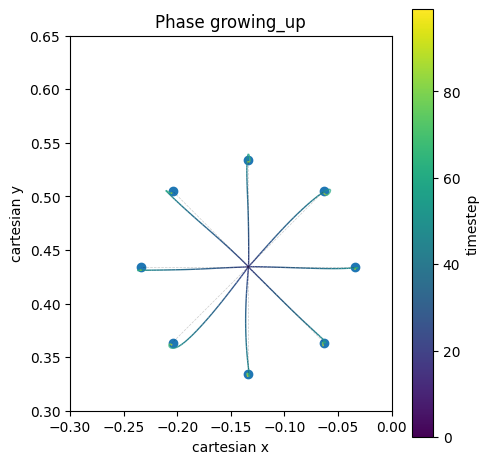

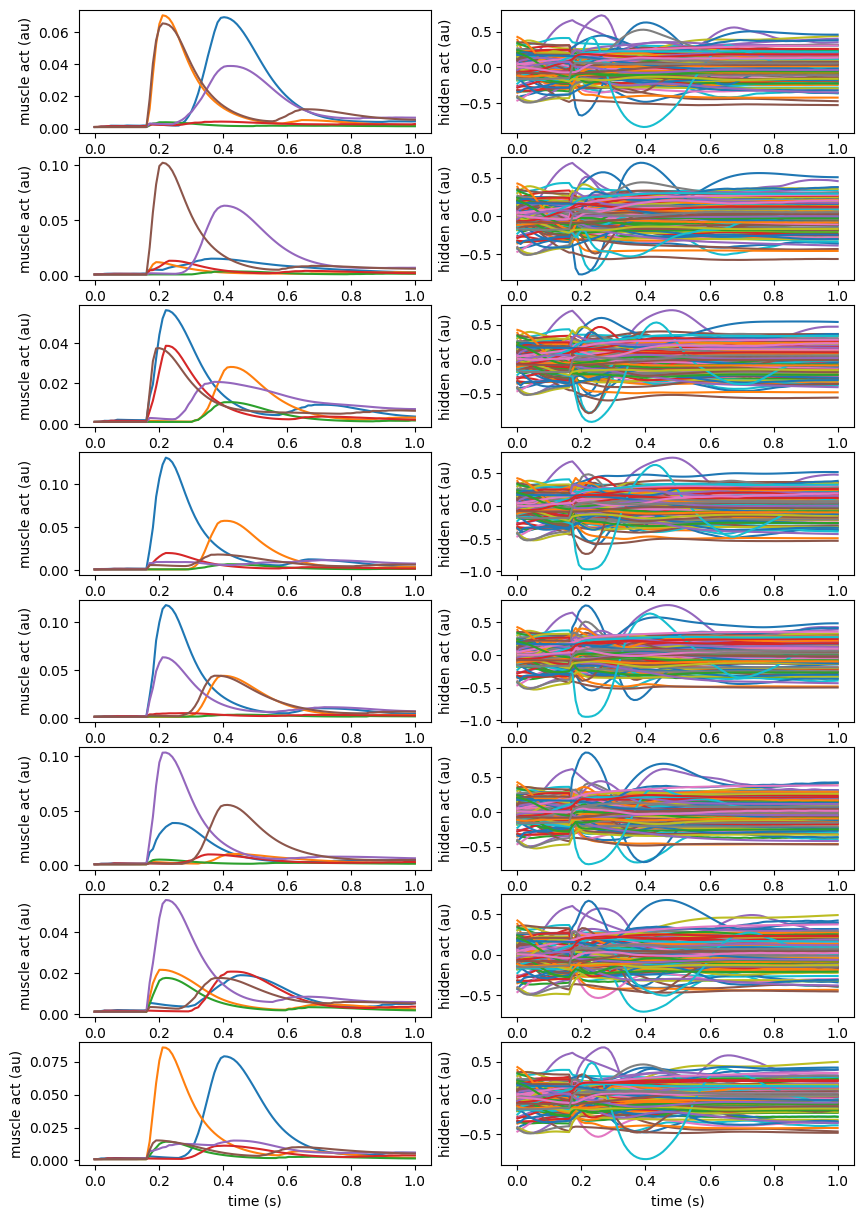

In [122]:
model_num = 39
# 0 1 6 10 11 14 23 33 [35] 36 37 [39] 41 [44]
model_name = "model{:02d}".format(model_num)
data=[]
#label = ['growing_up','NF1']
label = ['growing_up']
ff = [0,0]
is_channel = False
#K = 870
#B = -5
K = 170
B = -1
dT = 0.01

fig,ax = plt.subplots(1,len(label),figsize=(5*len(label),5))
for i,p in enumerate(label):
    weight_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_weights'))[0]
    cfg_file = list(Path(data_dir).glob(f'{model_name}_phase={p}_*_cfg.json'))[0]
    data.append(test(cfg_file,weight_file,ff_coefficient=ff[i],is_channel=is_channel,K=K,B=B,dT=dT))
    #plot.plot_simulations(ax[i],xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False)
    #ax[i].set_title(f'Phase {p}')
    plot.plot_simulations(ax,xy=data[i]['xy'],target_xy=data[i]['tg'],vel=None,plot_lat=False)
    ax.set_title(f'Phase {p}')
fig.savefig(os.path.join(data_dir,'simulation.png'),dpi=300)

plt.tight_layout()
plt.show()

fig, ax = plot.plot_activation(data[i]['all_hidden'],data[i]['all_muscle'],figsize=(10,15))
fig.savefig(os.path.join(data_dir,'activation.png'),dpi=300)

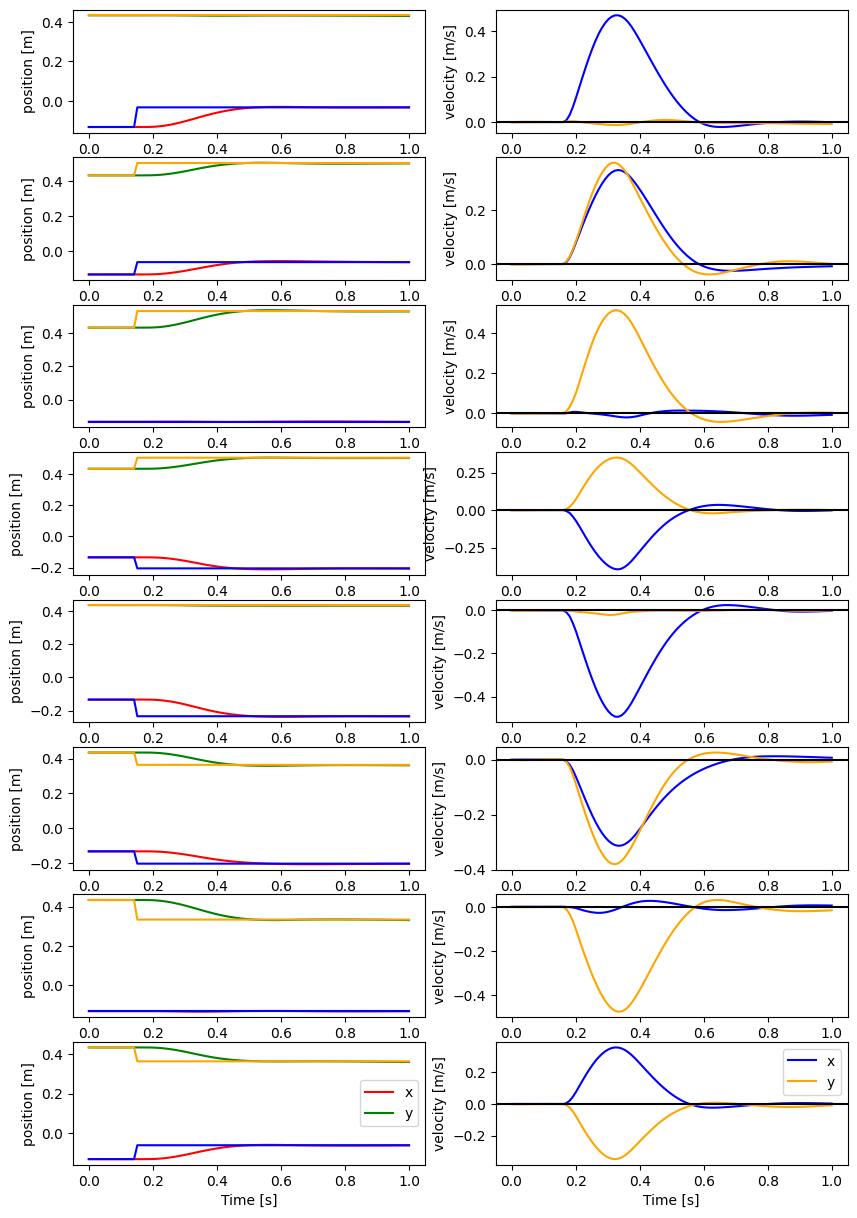

In [123]:
i = 0
fig, ax = plot.plot_kinematic(data[i]['vel'],data[i]['xy'],data[i]['tg'],figsize=(10,15))
fig.savefig(os.path.join(data_dir,'kinematic.png'),dpi=300)

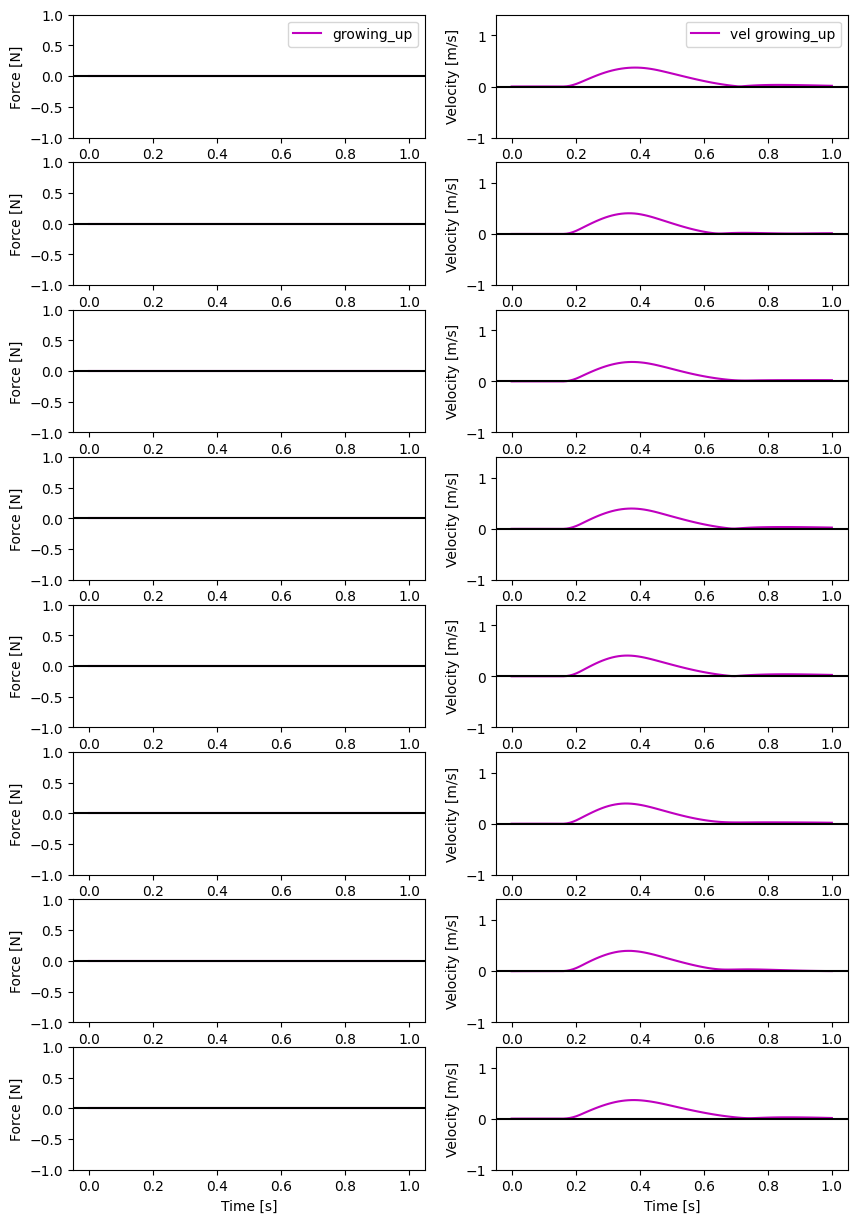

In [15]:
fig, ax = plot.plot_force(data,label,figsize=(10,15))